In [150]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram

In [151]:
backend = Aer.get_backend('qasm_simulator')

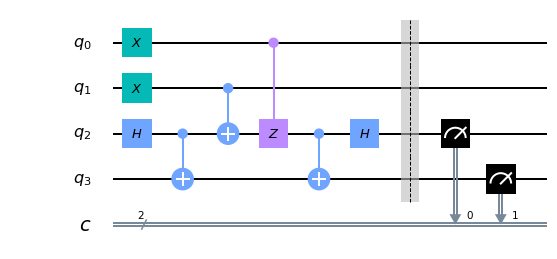

In [152]:
#Superdense Coding Protocol

circ = QuantumCircuit(4,2)
circ.x(0)
circ.x(1)
circ.h(2) #przygotowanie stanu splątanego
circ.cx(2, 3) #przygotowanie stanu splątanego
circ.cx(1, 2)
circ.cz(0, 2) #przesłanie kwantowej informacji

circ.cx(2, 3) #pomiar w bazie Bella
circ.h(2) #pomiar w bazie Bella

circ.barrier()

circ.measure(2,0) #pomiar w bazie Bella #przesłanie klasycznej informacji
circ.measure(3,1) #pomiar w bazie Bella #przesłanie klasycznej informacji
circ.draw()

In [153]:
job_sim = execute(circ, backend)

result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

{'11': 1024}


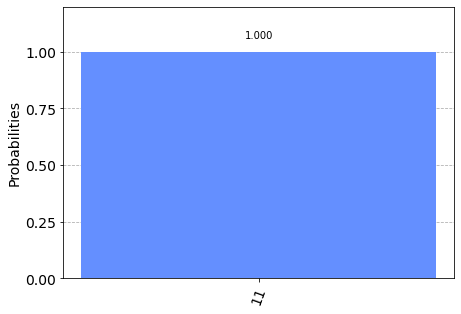

In [154]:
plot_histogram(counts)

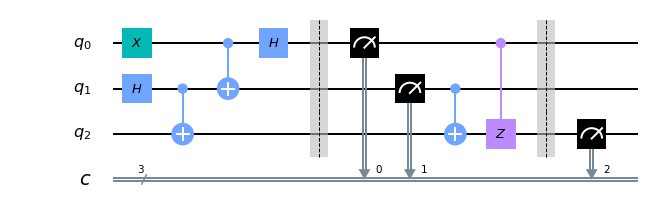

In [155]:
#Quantum teleportation

circ = QuantumCircuit(3,3)
circ.x(0)
circ.h(1) #przygotowanie stanu splątanego 
circ.cx(1,2) #przygotowanie stanu splątanego
circ.cx(0,1) #pomiar w bazie Bella
circ.h(0) #pomiar w bazie Bella
circ.barrier()
circ.measure(0,0) #pomiar w bazie Bella #przesłanie klasycznej informacji
circ.measure(1,1) #pomiar w bazie Bella #przesłanie klasycznej informacji
circ.cx(1,2)
circ.cz(0,2)
circ.barrier()
circ.measure(2,2)

circ.draw()

In [156]:
job_sim = execute(circ, backend)

result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

{'100': 264, '111': 264, '110': 236, '101': 260}


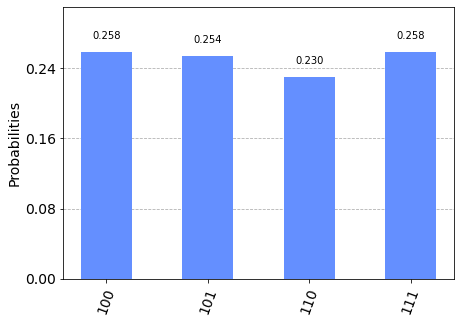

In [157]:
plot_histogram(counts)